In [1]:
# -*- coding: utf-8 -*-
## Exemplo de Criação de um modelo de Previsão/Classificação usando as Arvores de Decisão
## Example of Creating a Forecast/Classification model using Decision Trees

## import
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, ExtraTreeClassifier, ExtraTreeRegressor, export_graphviz
from sklearn import metrics

## carregar o ficheiro Insol para um dataframe do pandas dInsol
## load the Insol file into a pandas dInsol dataframe
dInsol = pd.read_csv('View_data_nullZero.csv')



dInsol.head(2)     #Mostra as primeiras n linhas do conjunto de dados
dInsol.tail(5)     #Mostra as últimas n linhas do conjunto de dados


,id_match_competition,t1_all_total5_fl_match_win,t1_all_total5_fl_match_draw,t1_all_total5_fl_match_lost,t1_all_total10_fl_match_win,t1_all_total10_fl_match_draw,t1_all_total10_fl_match_lost,t2_all_total5_fl_match_win,t2_all_total5_fl_match_draw,t2_all_total5_fl_match_lost,...,t1_h2h_home_total10_fl_match_win,t1_h2h_home_total10_fl_match_draw,t1_h2h_home_total10_fl_match_lost,t2_h2h_away_total5_fl_match_win,t2_h2h_away_total5_fl_match_draw,t2_h2h_away_total5_fl_match_lost,t2_h2h_away_total10_fl_match_win,t2_h2h_away_total10_fl_match_draw,t2_h2h_away_total10_fl_match_lost,t1_fl_match_win
43818,1069,1,4,0,3,6,1,3,1,1,...,0,1,0,0,1,0,0,1,0,0
43819,243,2,1,2,4,2,4,2,1,2,...,0,0,0,0,0,0,0,0,0,1
43820,214,1,3,1,5,3,2,3,0,2,...,2,2,0,0,2,2,0,2,2,1
43821,257,1,1,3,1,4,5,1,2,2,...,1,2,2,2,2,1,2,2,1,0
43822,8613,3,2,0,7,2,1,4,0,1,...,0,0,1,1,0,0,1,0,0,0


In [2]:
## Pre-processamento dividir os dados em conjunto de Treino e Teste
## Pre-processing split data into Training and Test sets
x = dInsol.drop('t1_fl_match_win', axis=1)   #Todas as tabelas que são usadas para fazer a predict
y = dInsol.t1_fl_match_win                   #Resultados entre 1 e 0 8Insolvência ou não Insolvênvia)


In [11]:
def modelDecisionTreeClassifier():
    DecisionTree_Class_Model = DecisionTreeClassifier()
    DecisionTree_Class_Model.fit(x_train, y_train)
      ##Previsao/Forecasting
    y_pred = DecisionTree_Class_Model.predict(x_teste)
    y_pred

##Accuracy Score
    accuracy = [metrics.accuracy_score(y_teste, y_pred),metrics.f1_score(y_teste, y_pred),metrics.recall_score(y_teste, y_pred),metrics.precision_score(y_teste, y_pred),metrics.mean_squared_error(y_teste, y_pred)]
    #f1 = metrics.f1_score(y_teste, y_pred)
    #rs = metrics.recall_score(y_teste, y_pred)
    #ps = metrics.precision_score(y_teste, y_pred)
    #mse = metrics.mean_squared_error(y_teste, y_pred)
    global y_pred_cm
    y_pred_cm = y_pred
    print ("\nResultados do modelo Decision Tree Classifier")
    print('Test size {:.2f}'.format(a))
    print("Metrics : ", accuracy)
   # print('Precision: {:.2f} MSE: {:.2f}'.format(ps,mse))



In [13]:
def modelExtraTreeClassifier():
    DecisionTree_Class_Model = ExtraTreeClassifier()
    DecisionTree_Class_Model.fit(x_train, y_train)
      ##Previsao/Forecasting
    y_pred = DecisionTree_Class_Model.predict(x_teste)
    y_pred

##Accuracy Score
    accuracy = metrics.accuracy_score(y_teste, y_pred)
    print ("\nResultados do modelo Extra Tree Classifier")
    print('Test size {:.2f} Acc: {}'.format(a,accuracy))
    rfc_fit = accuracy['estimator']
    rfc_fit = rfc_fit[0]
    filename = 'modelo_final-kf.sav'
    joblib.dump(rfc_fit, open(filename, 'wb'))


In [14]:
b= 0
a = 0.10
while a < 0.50:
      ## Function train_test_split
    x_train, x_teste, y_train, y_teste = train_test_split(x, y, test_size=a, random_state=18)
    modelDecisionTreeClassifier()
    #modelExtraTreeClassifier()
    a+=0.05
## Treinar o modelo
## Train the model






Resultados do modelo Decision Tree Classifier
Test size 0.10
Metrics :  [0.5439196897102441, 0.47325428194993413, 0.4812433011789925, 0.465526179367548, 0.4560803102897559]

Resultados do modelo Decision Tree Classifier
Test size 0.15
Metrics :  [0.5428962579860055, 0.45234189903408056, 0.4476911976911977, 0.4570902394106814, 0.4571037420139945]

Resultados do modelo Decision Tree Classifier
Test size 0.20
Metrics :  [0.5437535653166001, 0.4654457960165754, 0.4745162169528482, 0.4567156348373557, 0.45624643468339987]

Resultados do modelo Decision Tree Classifier
Test size 0.25
Metrics :  [0.5355969331872946, 0.45160594955809447, 0.45583115752828546, 0.4474583511319949, 0.4644030668127054]

Resultados do modelo Decision Tree Classifier
Test size 0.30
Metrics :  [0.5433939301741842, 0.4613728129205922, 0.46830601092896174, 0.4546419098143236, 0.45660606982581575]

Resultados do modelo Decision Tree Classifier
Test size 0.35
Metrics :  [0.5426038203272704, 0.4581402533209762, 0.46372732

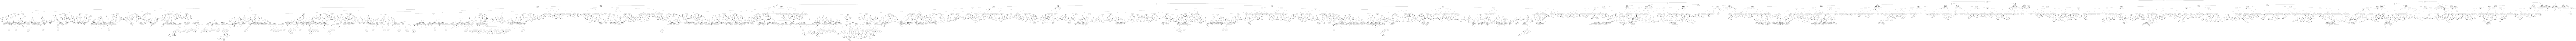

In [16]:

##Matriz da confusão
from sklearn.metrics import confusion_matrix

pd.DataFrame(
    confusion_matrix(y_teste, y_pred_cm),
    columns=['Previsão da t1_home ganhar ', 'Previsão da  t1_home não ganhar'],
    index=['Realidade de ganhar', 'Realidade de não ganhar']
)


model = DecisionTreeClassifier()
model.fit(x_train, y_train)

export_graphviz(model, out_file='tree.dot', feature_names=x.columns)
from subprocess import call

call(['dot', '-T', 'png', 'tree.dot', '-o', 'tree.png'])

from IPython.display import Image
Image(filename = 'tree.png')


In [17]:
#better then pickle
import joblib

filename = 'modelo_final.sav'
joblib.dump(model, open(filename, 'wb'))

In [18]:
# load the model from disk
loaded_model = joblib.load(open(filename, 'rb'))
result = loaded_model.score(x_teste, y_teste)
print(result)

# novo registo a prever
dNew = pd.read_csv('../files/data_sample_match_win.csv')
dNew = dNew.drop('t1_fl_match_win', axis=1)   #Remover a tabela Insolvencia  #Remove the Insolvency table
dNew.head(2)     #Mostra as primeiras n linhas do conjunto de dados   Display the first n rows of the dataset



0.536829134720701


,id_match_competition,t1_all_total5_fl_match_win,t1_all_total5_fl_match_draw,t1_all_total5_fl_match_lost,t1_all_total10_fl_match_win,t1_all_total10_fl_match_draw,t1_all_total10_fl_match_lost,t2_all_total5_fl_match_win,t2_all_total5_fl_match_draw,t2_all_total5_fl_match_lost,...,t1_h2h_home_total5_fl_match_lost,t1_h2h_home_total10_fl_match_win,t1_h2h_home_total10_fl_match_draw,t1_h2h_home_total10_fl_match_lost,t2_h2h_away_total5_fl_match_win,t2_h2h_away_total5_fl_match_draw,t2_h2h_away_total5_fl_match_lost,t2_h2h_away_total10_fl_match_win,t2_h2h_away_total10_fl_match_draw,t2_h2h_away_total10_fl_match_lost
0,328,5,0,0,6,2,0,0,0,4,...,0,4,0,0,0,0,2,0,0,4


In [19]:
#Fazer uma previsão com o novo registo
yNew = pd.Series(loaded_model.predict(dNew))
if yNew[0] == 0:
  print("Equipa da casa perde")
else:
  print("Equipa da casa ganha")

Equipa da casa ganha
